# OBD-II Datasets
Start adding your analysis and code here.

In [72]:
import requests
import pandas as pd
import io

github_raw_url = "https://raw.githubusercontent.com/cassandra-davis/cassandra-davis.github.io/main/projects/OBD-II_Datasets/exp3_4drivers_1car_1route.csv"

# --- Data Loading ---
response = requests.get(github_raw_url)
df = pd.read_csv(io.StringIO(response.text))
print("\n--- exp3_4drivers_1car_1route.csv --- DataFrame Head ---\n")
print(df.head())


--- exp3_4drivers_1car_1route.csv --- DataFrame Head ---

   ord      TIME      LATITUDE       LONGITUDE  ALTITUDE VEHICLE_ID  \
0    1  1,51E+12  -583.206.639  -3.520.573.159      42.0   control1   
1    2  1,51E+12  -583.206.639  -3.520.573.159      42.0   control1   
2    3  1,51E+12  -583.201.429  -3.520.570.624      44.0   control1   
3    4  1,51E+12    -5.831.937  -3.520.569.123      41.0   control1   
4    5  1,51E+12  -583.184.493  -3.520.559.225      46.0   control1   

   BAROMETRIC_PRESSURE  ENGINE_COOLANT_TEMP FUEL_LEVEL ENGINE_LOAD  ...  \
0                100.0                 95.0      56,10       43,10  ...   
1                100.0                 95.0      56,10       42,00  ...   
2                100.0                 94.0      56,10       50,60  ...   
3                100.0                 93.0      56,90       41,20  ...   
4                100.0                 91.0      56,90       55,70  ...   

   SPEED  SHORT TERM FUEL TRIM BANK 2  SHORT TERM FUEL TRIM BAN

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ord                          1743 non-null   int64  
 1   TIME                         1743 non-null   object 
 2   LATITUDE                     1743 non-null   object 
 3   LONGITUDE                    1743 non-null   object 
 4   ALTITUDE                     1743 non-null   float64
 5   VEHICLE_ID                   1743 non-null   object 
 6   BAROMETRIC_PRESSURE          1720 non-null   float64
 7   ENGINE_COOLANT_TEMP          1741 non-null   float64
 8   FUEL_LEVEL                   1741 non-null   object 
 9   ENGINE_LOAD                  1738 non-null   object 
 10  AMBIENT_AIR_TEMP             1740 non-null   float64
 11  ENGINE_RPM                   1741 non-null   float64
 12  INTAKE_MANIFOLD_PRESSURE     1743 non-null   int64  
 13  MAF               

In [74]:
df.describe()

,ord,ALTITUDE,BAROMETRIC_PRESSURE,ENGINE_COOLANT_TEMP,AMBIENT_AIR_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,TERM FUEL TRIM BANK 1,FUEL_ECONOMY,LONG TERM FUEL TRIM BANK 2,FUEL_TYPE,AIR_INTAKE_TEMP,FUEL_PRESSURE,SPEED,SHORT TERM FUEL TRIM BANK 2,TROUBLE_CODES,aqui
count,1743.000000,1743.000000,1720.000000,1741.000000,1740.000000,1741.000000,1743.000000,0.0,0.0,0.0,0.0,1716.000000,0.0,1655.000000,0.0,62.0,0.0
mean,872.000000,40.310958,99.796512,85.904078,5.902874,1756.306146,43.161790,NaN,NaN,NaN,NaN,31.660256,NaN,41.116012,NaN,4300.0,NaN
std,503.305076,5.844790,0.686773,4.301495,3.573800,1010.738357,23.908868,NaN,NaN,NaN,NaN,1.807166,NaN,29.307544,NaN,0.0,NaN
min,1.000000,16.000000,97.000000,79.000000,3.000000,0.000000,16.000000,NaN,NaN,NaN,NaN,28.000000,NaN,0.000000,NaN,4300.0,NaN
25%,436.500000,36.000000,100.000000,83.000000,4.000000,1046.000000,24.000000,NaN,NaN,NaN,NaN,30.000000,NaN,23.000000,NaN,4300.0,NaN
50%,872.000000,41.000000,100.000000,84.000000,4.000000,1518.000000,35.000000,NaN,NaN,NaN,NaN,31.000000,NaN,37.000000,NaN,4300.0,NaN
75%,1307.500000,45.000000,100.000000,88.000000,7.000000,2066.000000,52.000000,NaN,NaN,NaN,NaN,33.000000,NaN,56.000000,NaN,4300.0,NaN
max,1743.000000,61.000000,101.000000,100.000000,17.000000,5994.000000,102.000000,NaN,NaN,NaN,NaN,38.000000,NaN,159.000000,NaN,4300.0,NaN


In [75]:
# Convert HH:MM:SS strings to timedelta and then to total seconds
df['RUNTIME_SEC'] = pd.to_timedelta(df['ENGINE_RUNTIME']).dt.total_seconds()
print(df.head())

   ord      TIME      LATITUDE       LONGITUDE  ALTITUDE VEHICLE_ID  \
0    1  1,51E+12  -583.206.639  -3.520.573.159      42.0   control1   
1    2  1,51E+12  -583.206.639  -3.520.573.159      42.0   control1   
2    3  1,51E+12  -583.201.429  -3.520.570.624      44.0   control1   
3    4  1,51E+12    -5.831.937  -3.520.569.123      41.0   control1   
4    5  1,51E+12  -583.184.493  -3.520.559.225      46.0   control1   

   BAROMETRIC_PRESSURE  ENGINE_COOLANT_TEMP FUEL_LEVEL ENGINE_LOAD  ...  \
0                100.0                 95.0      56,10       43,10  ...   
1                100.0                 95.0      56,10       42,00  ...   
2                100.0                 94.0      56,10       50,60  ...   
3                100.0                 93.0      56,90       41,20  ...   
4                100.0                 91.0      56,90       55,70  ...   

   SHORT TERM FUEL TRIM BANK 2  SHORT TERM FUEL TRIM BANK 1  ENGINE_RUNTIME  \
0                          NaN             

In [76]:
# Convert HH:MM:SS strings to timedelta and then to total seconds
df['RUNTIME_SEC'] = pd.to_timedelta(df['ENGINE_RUNTIME']).dt.total_seconds()
print(df.head())

   ord      TIME      LATITUDE       LONGITUDE  ALTITUDE VEHICLE_ID  \
0    1  1,51E+12  -583.206.639  -3.520.573.159      42.0   control1   
1    2  1,51E+12  -583.206.639  -3.520.573.159      42.0   control1   
2    3  1,51E+12  -583.201.429  -3.520.570.624      44.0   control1   
3    4  1,51E+12    -5.831.937  -3.520.569.123      41.0   control1   
4    5  1,51E+12  -583.184.493  -3.520.559.225      46.0   control1   

   BAROMETRIC_PRESSURE  ENGINE_COOLANT_TEMP FUEL_LEVEL ENGINE_LOAD  ...  \
0                100.0                 95.0      56,10       43,10  ...   
1                100.0                 95.0      56,10       42,00  ...   
2                100.0                 94.0      56,10       50,60  ...   
3                100.0                 93.0      56,90       41,20  ...   
4                100.0                 91.0      56,90       55,70  ...   

   SHORT TERM FUEL TRIM BANK 2  SHORT TERM FUEL TRIM BANK 1  ENGINE_RUNTIME  \
0                          NaN             

In [80]:
df = df.sort_values(by='RUNTIME_SEC')
print(df['RUNTIME_SEC'].head())

1026    23.0
1027    28.0
1028    32.0
1029    36.0
1030    40.0
Name: RUNTIME_SEC, dtype: float64


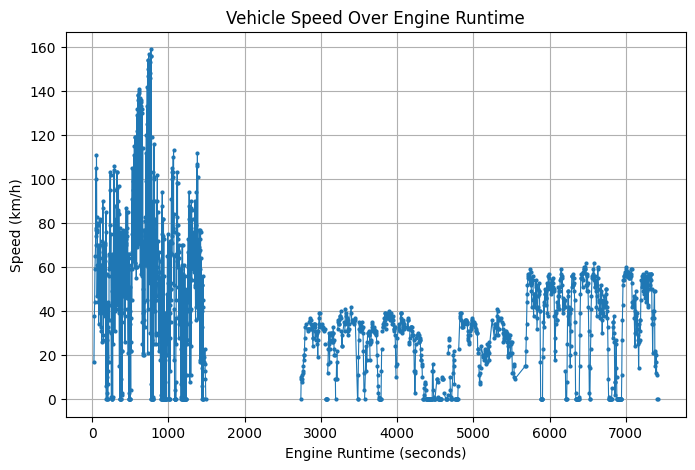

In [79]:
import matplotlib.pyplot as plt

x = df['RUNTIME_SEC']
y = df['SPEED']

plt.figure(figsize=(8,5))
plt.plot(x, y, marker='o', markersize=2, linestyle='-', linewidth=0.8)
plt.xlabel('Engine Runtime (seconds)')
plt.ylabel('Speed (km/h)')
plt.title('Vehicle Speed Over Engine Runtime')
plt.grid(True)
plt.show()


In [86]:
vehicle_ids = df['VEHICLE_ID'].unique()
print(vehicle_ids)

['control3' 'control4' 'control1' 'control2']


In [87]:
num_vehicles = len(vehicle_ids)
print(num_vehicles)

4


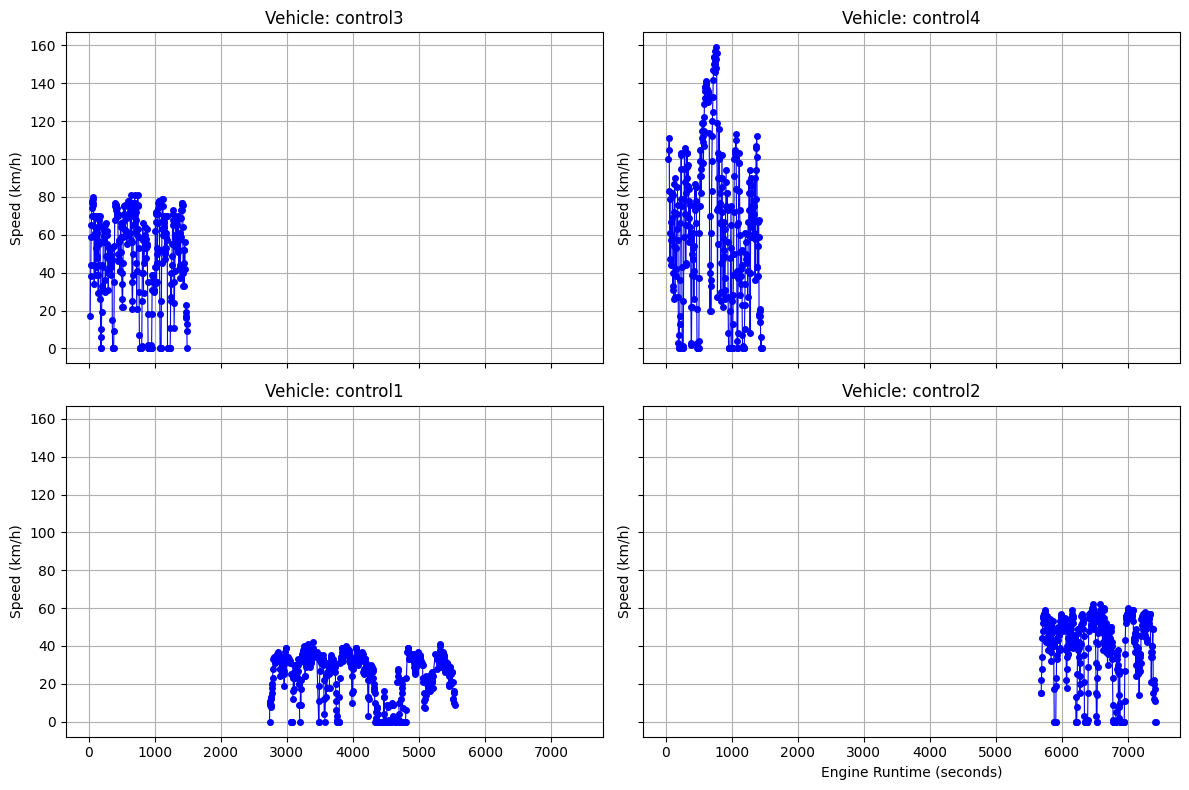

In [90]:
rows, cols = 2, 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, vid in zip(axes, vehicle_ids):
    vehicle_data = df[df['VEHICLE_ID'] == vid].sort_values('RUNTIME_SEC')
    ax.plot(vehicle_data['RUNTIME_SEC'], vehicle_data['SPEED'],
            marker='o', markersize=4, linestyle='-', linewidth=0.8, color='blue')
    ax.set_ylabel('Speed (km/h)')
    ax.set_title(f'Vehicle: {vid}')
    ax.grid(True)

axes[-1].set_xlabel('Engine Runtime (seconds)')
plt.tight_layout()
plt.show()